In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib inline

# Flattening

In [3]:
files= np.loadtxt('l2data.txt', dtype='str')
darks = np.loadtxt('darksl2.txt', dtype='str')
allimagedata = [fits.getdata(f) for f in files]
darksimages = [fits.getdata(f) for f in darks]
darksmedia = np.median(darksimages, axis=0)
flatteddatal2 = allimagedata - darksmedia

We plot an example one

<matplotlib.colorbar.Colorbar instance at 0x7f5dba1c08c0>

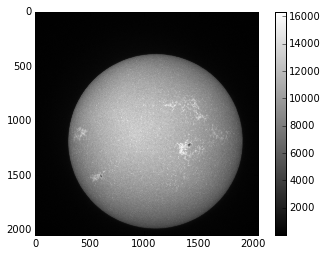

In [4]:
plt.imshow(flatteddatal2[0],cmap='gray')
plt.colorbar()

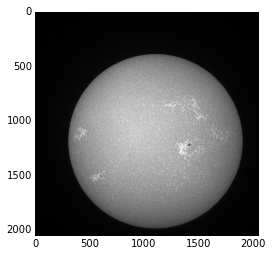

In [5]:
plt.imshow(allimagedata[0],cmap='gray')

In [16]:
for i in range(109):
    fits.writeto(files[i]+'processed'+'.fts',flatteddatal2[i],header=fits.open(files[i])[0].header)

# Brillance

We create the median of all the flatted data.

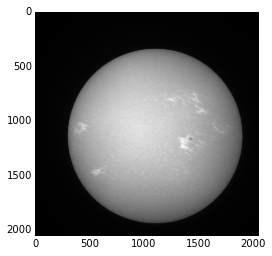

In [15]:
medianflattedl2 = np.median(flatteddatal2, axis=0)
plt.imshow(medianflattedl2,cmap='gray')

We can now mask to get only the disk of the Sun. For l1 we decide a threshold of 900 *adu*. We create the mask and put to zero all below 900. The mask looks like

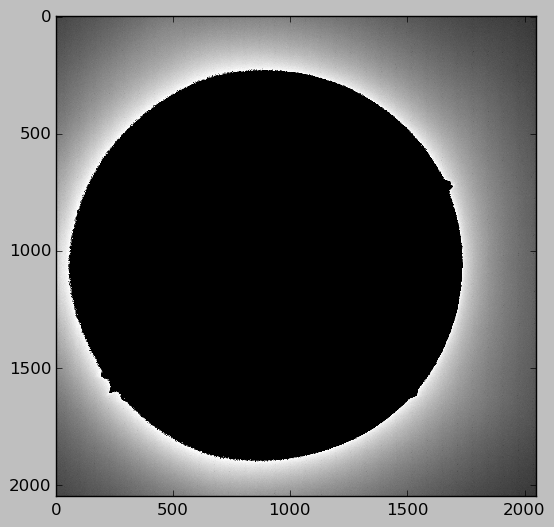

In [36]:
maskl2 = medianflattedl2 < 800 
maskedl2=(np.where(maskl2,1,0))*medianflattedl2
plt.imshow(maskedl2, cmap='gray')

In [ ]:
The resulting masked image looks like:

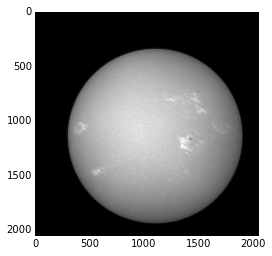

In [16]:
maskl2 = medianflattedl2 < 900 
maskedl2=(np.where(maskl2,0,1))*medianflattedl2
plt.imshow(maskedl2, cmap='gray')


Now we calculate the total of the masked image to get the luminosity of the Sun:
    

In [17]:
totall2 = np.sum(maskedl2)
print(totall2)

26969465948.0


# Brillance Callibration

Now that we have 